# Asset Pricing - OSE Bootcamp - Scott Condie
## Jeanne Sorin

## Section 2: The Lucas Tree Model of Asset Pricing

In [446]:
import pandas as pd
import numpy as np
from fredapi import Fred
from scipy.optimize import broyden1
from scipy.optimize import root

import scipy as sp

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()



### Download data
fred = Fred(api_key='abbf257e9c218db2f4f1c220f837bc16')
PCECC96 = fred.get_series('PCECC96')
WILL5000 = fred.get_series('WILL5000INDFC')
GDPDEF = fred.get_series('GDPDEF')
TB3MS = fred.get_series('TB3MS')



In [447]:
### Transform the Wilshire 5000 series and the T-Bill series into quarterly data
WILL5000Q = WILL5000.resample('Q', how='mean', fill_method='bfill')
TB3MSQ = TB3MS.resample('Q', how='mean', fill_method='bfill')

### Shift
WILL5000Q = WILL5000Q.shift(1, freq='D')
TB3MSQ = TB3MSQ.shift(1, freq='D')
###

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).mean().bfill()
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).mean().bfill()
  This is separate from the ipykernel package so we can avoid doing imports until


In [448]:
### Create dataframe
data = pd.DataFrame()
data.insert(0, "Consommation", PCECC96)
data.insert(1, "Return", WILL5000Q)
data.insert(2, "Deflator", GDPDEF)
data.insert(3, "TBill", TB3MSQ)


In [449]:
### Compute index
data.insert(4, "RealReturn", ((data.Return.pct_change()+1) / (data.Deflator.pct_change()+1)))
data.insert(5, "RealTBill", ((data.TBill.pct_change()+1) / (data.Deflator.pct_change()+1)))

### Drop NA
dataset = data.dropna("index")
dataset



,Consommation,Return,Deflator,TBill,RealReturn,RealTBill
1971-04-01,3185.993,1.080000,22.685,3.840000,1.066003,0.708014
1971-07-01,3211.394,1.136667,22.916,4.250000,1.041860,1.095614
1971-10-01,3264.679,1.113333,23.107,5.010000,0.971376,1.169079
1972-01-01,3307.767,1.113333,23.458,4.230000,0.985037,0.831678
1972-04-01,3370.736,1.240000,23.604,3.436667,1.106883,0.807425
1972-07-01,3422.682,1.280000,23.830,3.770000,1.022468,1.086589
1972-10-01,3503.001,1.293333,24.134,4.220000,0.997689,1.105264
1973-01-01,3566.957,1.356667,24.412,4.863333,1.037024,1.139325
1973-04-01,3565.349,1.306667,24.787,5.700000,0.948574,1.154304
1973-07-01,3577.898,1.196667,25.270,6.603333,0.898312,1.136337


### Question 1

In [5]:
β = 0.99


def euler_error(γ, dataframe):
    
    # Subset panda dataset 
    extract = pd.DataFrame()
    extract.insert(0, "RealReturn", dataset.RealReturn)
    # Add mt+1 = β*(u'(ct+1)/u'(ct))
    extract.insert(1, "m", (dataframe.Consommation.pct_change()+1)**(-γ)*β)
    #extract = extract.dropna("index")
    
    # Compute Em & Er expected sdf & real return
    Em = np.mean(extract.m)    
    print("Em", Em)
    Er = extract.RealReturn.mean()
    print("Er is", Er)
    
    
    # Compute covariance
    Cov = extract.cov()
    #print(Cov)
    
    # Compute error (equation 5)
    error = 1 - Cov["RealReturn"][1] - Em*Er
    print("error is", error)
    return(error)
euler_error(1.2, dataset)
 

Em 0.9812532644280597
Er is 1.0192010448476876
error is 4.618732132044556e-05


4.618732132044556e-05

In [6]:
sp.optimize.root(euler_error, 1.6, args=(dataset))

Em 0.9783676044117483
Er is 1.0192010448476876
error is 0.0030339057408419468
Em 0.9783676044117483
Er is 1.0192010448476876
error is 0.0030339057408419468
Em 0.9783676044117483
Er is 1.0192010448476876
error is 0.0030339057408419468
Em 0.9783676042401933
Er is 1.0192010448476876
error is 0.003033905918468749
Em 0.9813055184874994
Er is 1.0192010448476876
error is -7.913506702372786e-06
Em 0.981297855273318
Er is 1.0192010448476876
error is 2.053868786155988e-08
Em 0.9812978751107767
Er is 1.0192010448476876
error is 1.376676550535194e-13
Em 0.9812978751109088
Er is 1.0192010448476876
error is 8.881784197001252e-16


    fjac: array([[-1.]])
     fun: 8.881784197001252e-16
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.37667655e-13])
       r: array([-0.00748898])
  status: 1
 success: True
       x: array([1.19383238])

## Question 2

**How would you determine if this parameter is reasonable?**

## Question 3

In [7]:
β = 0.99


def rf_error(γ, dataframe):
    print("γ is ", γ)
    # Subset panda dataset 
    extract = pd.DataFrame()
    extract.insert(0, "RealTBill", dataset.RealTBill)
    # Add mt+1 = β*(u'(ct+1)/u'(ct))
    extract.insert(1, "m", (dataframe.Consommation.pct_change() +1)**(-γ)*β)
    #extract = extract.dropna("index")
    
    # Compute Em & Er expected sdf & real return
    Em = np.mean(extract.m)    
    print("Em is ", Em)
    Erf = extract.RealTBill.mean()
    print("Erf is ", Erf)
    # Compute covariance
    #Cov = extract.cov()
    #print(Cov)
    
    # Compute error (equation 5)
    error = (Erf)*Em-1
    print("Error is ", error)
    return(error)

In [10]:
rf_error(1.4, dataset)
root(rf_error, 1.4, args=(dataset))

γ is  1.4
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.4]
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.4]
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.4]
Em is  0.9798085745325386
Erf is  1.0327741979355558
Error is  0.011921014693222709
γ is  [1.40000002]
Em is  0.9798085743820396
Erf is  1.0327741979355558
Error is  0.011921014537791264
γ is  [3.00000922]
Em is  0.9683841903889493
Erf is  1.0327741979355558
Error is  0.00012220552241970495
γ is  [3.01658123]
Em is  0.9682670934570038
Erf is  1.0327741979355558
Error is  1.2708324490517953e-06
γ is  [3.01675538]
Em is  0.9682658630864546
Erf is  1.0327741979355558
Error is  1.3749179572641879e-10
γ is  [3.01675539]
Em is  0.9682658629533254
Erf is  1.0327741979355558
Error is  -5.551115123125783e-16


    fjac: array([[-1.]])
     fun: -5.551115123125783e-16
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.37491796e-10])
       r: array([0.00729674])
  status: 1
 success: True
       x: array([3.01675539])

## Question 4



In [11]:
def overall_error(X, dataframe):
    β, γ = X
    print("X guess is ", X)
    extract = pd.DataFrame()
    extract.insert(0, "RealReturn", dataset.RealReturn)
    extract.insert(1, "RealTBill", dataset.RealTBill)

    # Add mt+1 = β*(u'(ct+1)/u'(ct))
    extract.insert(2, "m", (dataframe.Consommation.pct_change() +1)**(-γ)*β)
    #extract = extract.dropna("index")
    
    # Compute Em & Er expected sdf & real return
    Em = np.mean(extract.m)    
    print("Em is ", Em)
    Er = extract.RealReturn.mean() 
    print("Er is ", Er)
    Erf = extract.RealTBill.mean()
    print("Erf is ", Erf)

    # Compute covariance
    Cov = extract.cov()
    #print(Cov)
    
    
    # Compute error (equation 5)
    error1 = 1 - Cov["RealReturn"][2] - Em*Er
    error2 = (Erf)*Em-1
    if γ < 0:
        error1 = 5000000000000000
        error2 = 5000000000000000
    if β > 1.:
        error1 = 5000000000000000
        error2 = 5000000000000000
    error1 = np.linalg.norm(error1)
    error2 = np.linalg.norm(error2)
    print("Error 1 is ", error1)
    print("Error 2 is ", error2)
    return [error1, error2]

In [12]:
#overall_error([0.99, 3.1], dataset)
root(overall_error, [0.98, 3.1], args=(dataset))

X guess is  [0.98 3.1 ]
Em is  0.9579035158318461
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061371875116477
Error 2 is  0.010701964737116154
X guess is  [0.98 3.1 ]
Em is  0.9579035158318461
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061371875116477
Error 2 is  0.010701964737116154
X guess is  [0.98 3.1 ]
Em is  0.9579035158318461
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061371875116477
Error 2 is  0.010701964737116154
X guess is  [0.98000001 3.1       ]
Em is  0.9579035301057206
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.024061357332497924
Error 2 is  0.01070194999542684
X guess is  [0.98       3.10000005]
Em is  0.9579035155091234
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.02406137220932303
Error 2 is  0.010701965070415764
X guess is  [   0.16613403 -112.25104381]
Em is  0.4793783521229497
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  

    fjac: array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])
     fun: array([0.02406137, 0.01070196])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 15
     qtf: array([-0.02458139,  0.00944653])
       r: array([ 4.25267472e+15,  3.12954305e+13, -5.68032265e-05])
  status: 5
 success: False
       x: array([0.98, 3.1 ])

In [13]:
### Plot the result
N = 25
gamma_v = np.linspace(0.0, 5., N)
beta_v = np.linspace(0.0, 1., N)

matrix1 = np.zeros((N, N))
matrix2 = np.zeros((N, N))

for i in range(N):
    print("Range of gamma is ", i)
    for j in range(N):
        g = gamma_v[j]
        b = beta_v[i]
        matrix1[i,j] = overall_error([b,g], dataset)[0]
        matrix2[i,j] = overall_error([b,g], dataset)[1]


Range of gamma is  0
X guess is  [0.0, 0.0]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.0]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.20833333333333334]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.20833333333333334]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.4166666666666667]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.4166666666666667]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.625]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  1.0
Error 2 is  1.0
X guess is  [0.0, 0.625]
Em is  0.0
Er is  1.0192010448476876
Erf is  1.0327741979

Em is  0.040719765595279796
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585136996288031
Error 2 is  0.9579456767472111
X guess is  [0.041666666666666664, 3.125]
Em is  0.040719765595279796
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585136996288031
Error 2 is  0.9579456767472111
X guess is  [0.041666666666666664, 3.3333333333333335]
Em is  0.040657986276169525
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585776783752417
Error 2 is  0.9580094808339542
X guess is  [0.041666666666666664, 3.3333333333333335]
Em is  0.040657986276169525
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9585776783752417
Error 2 is  0.9580094808339542
X guess is  [0.041666666666666664, 3.541666666666667]
Em is  0.04059637312916824
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9586414867208618
Error 2 is  0.9580731133024307
X guess is  [0.041666666666666664, 3.541666666666667]
Em is  0.04059637312916824

Em is  0.0816876486444666
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9167704586065921
Error 2 is  0.9156351041899695
X guess is  [0.08333333333333333, 2.7083333333333335]
Em is  0.0816876486444666
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9167704586065921
Error 2 is  0.9156351041899695
X guess is  [0.08333333333333333, 2.916666666666667]
Em is  0.08156342295845488
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9168991001487694
Error 2 is  0.9157634012732032
X guess is  [0.08333333333333333, 2.916666666666667]
Em is  0.08156342295845488
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9168991001487694
Error 2 is  0.9157634012732032
X guess is  [0.08333333333333333, 3.125]
Em is  0.08143953119055959
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.9170273992576059
Error 2 is  0.9158913534944222
X guess is  [0.08333333333333333, 3.125]
Em is  0.08143953119055959
Er is  1.01920104484768

Error 1 is  0.8747682174060122
Error 2 is  0.8730662082473023
X guess is  [0.125, 2.291666666666667]
Em is  0.12290565740936359
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8747682174060122
Error 2 is  0.8730662082473023
X guess is  [0.125, 2.5]
Em is  0.1227183135600432
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8749622107159368
Error 2 is  0.8732596921410223
X guess is  [0.125, 2.5]
Em is  0.1227183135600432
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8749622107159368
Error 2 is  0.8732596921410223
X guess is  [0.125, 2.7083333333333335]
Em is  0.1225314729666999
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8751556879098882
Error 2 is  0.8734526562849543
X guess is  [0.125, 2.7083333333333335]
Em is  0.1225314729666999
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8751556879098882
Error 2 is  0.8734526562849543
X guess is  [0.125, 2.916666666666667]
Em is  0.122345134437682

Em is  0.16387420987915144
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.833024289874683
Error 2 is  0.8307549443297364
X guess is  [0.16666666666666666, 2.291666666666667]
Em is  0.16387420987915144
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.833024289874683
Error 2 is  0.8307549443297364
X guess is  [0.16666666666666666, 2.5]
Em is  0.16362441808005748
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8332829476212494
Error 2 is  0.8310129228546965
X guess is  [0.16666666666666666, 2.5]
Em is  0.16362441808005748
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8332829476212494
Error 2 is  0.8310129228546965
X guess is  [0.16666666666666666, 2.7083333333333335]
Em is  0.1633752972889332
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.8335409172131841
Error 2 is  0.831270208379939
X guess is  [0.16666666666666666, 2.7083333333333335]
Em is  0.1633752972889332
Er is  1.0192010448476876
Erf

Em is  0.20359882797639886
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7925684981440151
Error 2 is  0.7897283837360555
X guess is  [0.20833333333333331, 3.125]
Em is  0.20359882797639886
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7925684981440151
Error 2 is  0.7897283837360555
X guess is  [0.20833333333333331, 3.3333333333333335]
Em is  0.20328993138084758
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7928883918762085
Error 2 is  0.7900474041697709
X guess is  [0.20833333333333331, 3.3333333333333335]
Em is  0.20328993138084758
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7928883918762085
Error 2 is  0.7900474041697709
X guess is  [0.20833333333333331, 3.541666666666667]
Em is  0.2029818656458411
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7932074336043087
Error 2 is  0.7903655665121537
X guess is  [0.20833333333333331, 3.541666666666667]
Em is  0.2029818656458411
Er is  1.0

Error 1 is  0.7526115629839828
Error 2 is  0.7491991899958084
X guess is  [0.25, 3.9583333333333335]
Em is  0.2428418627281017
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7526115629839828
Error 2 is  0.7491991899958084
X guess is  [0.25, 4.166666666666667]
Em is  0.24247516089501894
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7529913604093266
Error 2 is  0.749577910187352
X guess is  [0.25, 4.166666666666667]
Em is  0.24247516089501894
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7529913604093266
Error 2 is  0.749577910187352
X guess is  [0.25, 4.375]
Em is  0.24210944675817847
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7533701451103085
Error 2 is  0.7499556103117011
X guess is  [0.25, 4.375]
Em is  0.24210944675817847
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7533701451103085
Error 2 is  0.7499556103117011
X guess is  [0.25, 4.583333333333334]
Em is  0.24174471800562905

Error 1 is  0.7118232538108809
Error 2 is  0.7078408952185773
X guess is  [0.29166666666666663, 4.166666666666667]
Em is  0.2828876877108555
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7118232538108809
Error 2 is  0.7078408952185773
X guess is  [0.29166666666666663, 4.375]
Em is  0.282461021217875
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7122651692953599
Error 2 is  0.7082815453636512
X guess is  [0.29166666666666663, 4.375]
Em is  0.282461021217875
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7122651692953599
Error 2 is  0.7082815453636512
X guess is  [0.29166666666666663, 4.583333333333334]
Em is  0.2820355043399006
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7127059060650853
Error 2 is  0.7087210082160091
X guess is  [0.29166666666666663, 4.583333333333334]
Em is  0.2820355043399006
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.7127059060650853
Error 2 is  0.70872100821

Em is  0.3233002145266922
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6706551472124349
Error 2 is  0.6661038802498023
X guess is  [0.3333333333333333, 4.166666666666667]
Em is  0.3233002145266922
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6706551472124349
Error 2 is  0.6661038802498023
X guess is  [0.3333333333333333, 4.375]
Em is  0.3228125956775714
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6711601934804112
Error 2 is  0.6666074804156013
X guess is  [0.3333333333333333, 4.375]
Em is  0.3228125956775714
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.6711601934804112
Error 2 is  0.6666074804156013
X guess is  [0.3333333333333333, 4.583333333333334]
Em is  0.3223262906741719
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.671663892645812
Error 2 is  0.6671097236754393
X guess is  [0.3333333333333333, 4.583333333333334]
Em is  0.3223262906741719
Er is  1.0192010448476876
Erf is  

Em is  0.41538199146003363
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5766628209177724
Error 2 is  0.5710041969329899
X guess is  [0.41666666666666663, 0.4166666666666667]
Em is  0.41538199146003363
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5766628209177724
Error 2 is  0.5710041969329899
X guess is  [0.41666666666666663, 0.625]
Em is  0.4147422330400529
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5773251366149261
Error 2 is  0.571664922922058
X guess is  [0.41666666666666663, 0.625]
Em is  0.4147422330400529
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5773251366149261
Error 2 is  0.571664922922058
X guess is  [0.41666666666666663, 0.8333333333333334]
Em is  0.4141041885712646
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5779856941678825
Error 2 is  0.5723238787865581
X guess is  [0.41666666666666663, 0.8333333333333334]
Em is  0.4141041885712646
Er is  1.0192010448476876

Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5372317070428639
Error 2 is  0.5310001468107438
X guess is  [0.4583333333333333, 1.4583333333333335]
Em is  0.45342032764469103
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5379525465082875
Error 2 is  0.5317191847890773
X guess is  [0.4583333333333333, 1.4583333333333335]
Em is  0.45342032764469103
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5379525465082875
Error 2 is  0.5317191847890773
X guess is  [0.4583333333333333, 1.6666666666666667]
Em is  0.45272597508404044
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5386714706461536
Error 2 is  0.5324362941979877
X guess is  [0.4583333333333333, 1.6666666666666667]
Em is  0.45272597508404044
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.5386714706461536
Error 2 is  0.5324362941979877
X guess is  [0.4583333333333333, 1.875]
Em is  0.45203348543876487
Er is  1.0192010448476876
Erf is  1.03

Error 1 is  0.49437339740148123
Error 2 is  0.4875772825241963
X guess is  [0.5, 1.25]
Em is  0.49539987007993985
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.49516186222857894
Error 2 is  0.4883637965208115
X guess is  [0.5, 1.25]
Em is  0.49539987007993985
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.49516186222857894
Error 2 is  0.4883637965208115
X guess is  [0.5, 1.4583333333333335]
Em is  0.49464035743057205
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4959482325544955
Error 2 is  0.48914820158808425
X guess is  [0.5, 1.4583333333333335]
Em is  0.49464035743057205
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4959482325544955
Error 2 is  0.48914820158808425
X guess is  [0.5, 1.6666666666666667]
Em is  0.4938828819098624
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4967325134321675
Error 2 is  0.489930502761441
X guess is  [0.5, 1.6666666666666667]
Em is  0.4938828819098624

Error 1 is  0.4539439186007036
Error 2 is  0.4465772183870915
X guess is  [0.5416666666666666, 1.4583333333333335]
Em is  0.5358603872164529
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4539439186007036
Error 2 is  0.4465772183870915
X guess is  [0.5416666666666666, 1.6666666666666667]
Em is  0.535039788735684
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.45479355621818174
Error 2 is  0.4474247113248947
X guess is  [0.5416666666666666, 1.6666666666666667]
Em is  0.535039788735684
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.45479355621818174
Error 2 is  0.4474247113248947
X guess is  [0.5416666666666666, 1.875]
Em is  0.5342213918821767
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.45564093572042463
Error 2 is  0.44826993047886876
X guess is  [0.5416666666666666, 1.875]
Em is  0.5342213918821767
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.45564093572042463
Error 2 is  0.44826993

Em is  0.5744363599838521
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4146772981209299
Error 2 is  0.4067369490526569
X guess is  [0.5833333333333333, 2.0833333333333335]
Em is  0.5744363599838521
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.4146772981209299
Error 2 is  0.4067369490526569
X guess is  [0.5833333333333333, 2.291666666666667]
Em is  0.5735597345770297
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.41558501456139085
Error 2 is  0.40764230515407784
X guess is  [0.5833333333333333, 2.291666666666667]
Em is  0.5735597345770297
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.41558501456139085
Error 2 is  0.40764230515407784
X guess is  [0.5833333333333333, 2.5]
Em is  0.5726854632802011
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.41649031667437275
Error 2 is  0.40854522999143816
X guess is  [0.5833333333333333, 2.5]
Em is  0.5726854632802011
Er is  1.0192010448476876
Erf 

Em is  0.6126573648334995
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3757784395494408
Error 2 is  0.3672632814247714
X guess is  [0.625, 2.916666666666667]
Em is  0.611725672188412
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3767432511157701
Error 2 is  0.368225509549024
X guess is  [0.625, 2.916666666666667]
Em is  0.611725672188412
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3767432511157701
Error 2 is  0.368225509549024
X guess is  [0.625, 3.125]
Em is  0.6107964839291964
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3777054944320454
Error 2 is  0.36918515120816664
X guess is  [0.625, 3.125]
Em is  0.6107964839291964
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3777054944320454
Error 2 is  0.36918515120816664
X guess is  [0.625, 3.3333333333333335]
Em is  0.6098697941425432
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.37866517562862545
Error 2 is  0.

Em is  0.6485588122085741
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.33928200114076845
Error 2 is  0.3301851929072531
X guess is  [0.6666666666666666, 3.9583333333333335]
Em is  0.6475783006082713
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3402975012906204
Error 2 is  0.33119783998882235
X guess is  [0.6666666666666666, 3.9583333333333335]
Em is  0.6475783006082713
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3402975012906204
Error 2 is  0.33119783998882235
X guess is  [0.6666666666666666, 4.166666666666667]
Em is  0.6466004290533844
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3413102944248698
Error 2 is  0.33220776049960465
X guess is  [0.6666666666666666, 4.166666666666667]
Em is  0.6466004290533844
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3413102944248698
Error 2 is  0.33220776049960465
X guess is  [0.6666666666666666, 4.375]
Em is  0.6456251913551428
Er is  1.01920

Error 1 is  0.30121541114587347
Error 2 is  0.2915408958831527
X guess is  [0.7083333333333333, 4.583333333333334]
Em is  0.684943367682615
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.30228577187235073
Error 2 is  0.29260816281030877
X guess is  [0.7083333333333333, 4.583333333333334]
Em is  0.684943367682615
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.30228577187235073
Error 2 is  0.29260816281030877
X guess is  [0.7083333333333333, 4.791666666666667]
Em is  0.6839127549469958
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3033532767729725
Error 2 is  0.29367255305172013
X guess is  [0.7083333333333333, 4.791666666666667]
Em is  0.6839127549469958
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3033532767729725
Error 2 is  0.29367255305172013
X guess is  [0.7083333333333333, 5.0]
Em is  0.6828849211073361
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.3044179325893258
Error 2 is  0

Em is  0.790444589115673
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.19439761132512434
Error 2 is  0.18364922346356094
X guess is  [0.7916666666666666, 0.4166666666666667]
Em is  0.7892257837740639
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.19565935974376747
Error 2 is  0.18490797417268068
X guess is  [0.7916666666666666, 0.4166666666666667]
Em is  0.7892257837740639
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.19565935974376747
Error 2 is  0.18490797417268068
X guess is  [0.7916666666666666, 0.625]
Em is  0.7880102427761008
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.19691775956835933
Error 2 is  0.18616335355190994
X guess is  [0.7916666666666666, 0.625]
Em is  0.7880102427761008
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.19691775956835933
Error 2 is  0.18616335355190994
X guess is  [0.7916666666666666, 0.8333333333333334]
Em is  0.786797958285403
Er is  1.0192010448476

Error 1 is  0.15860310371429776
Error 2 is  0.1472729942013522
X guess is  [0.8333333333333333, 1.25]
Em is  0.8256664501332335
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.15860310371429776
Error 2 is  0.1472729942013522
X guess is  [0.8333333333333333, 1.4583333333333335]
Em is  0.8244005957176198
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.15991372092415934
Error 2 is  0.14858033598014075
X guess is  [0.8333333333333333, 1.4583333333333335]
Em is  0.8244005957176198
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.15991372092415934
Error 2 is  0.14858033598014075
X guess is  [0.8333333333333333, 1.6666666666666667]
Em is  0.8231381365164374
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.1612208557202791
Error 2 is  0.14988417126906828
X guess is  [0.8333333333333333, 1.6666666666666667]
Em is  0.8231381365164374
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.1612208557202791
Error 

Error 1 is  0.12201594718139508
Error 2 is  0.11010542357898556
X guess is  [0.875, 2.0833333333333335]
Em is  0.861654539975778
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.12201594718139508
Error 2 is  0.11010542357898556
X guess is  [0.875, 2.291666666666667]
Em is  0.860339601865545
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.12337752184208595
Error 2 is  0.11146345773111632
X guess is  [0.875, 2.291666666666667]
Em is  0.860339601865545
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.12337752184208595
Error 2 is  0.11146345773111632
X guess is  [0.875, 2.5]
Em is  0.8590281949203016
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.12473547501155913
Error 2 is  0.11281784498715719
X guess is  [0.875, 2.5]
Em is  0.8590281949203016
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.12473547501155913
Error 2 is  0.11281784498715719
X guess is  [0.875, 2.7083333333333335]
Em is  0.8577203

Error 1 is  0.08589010163646282
Error 2 is  0.07339741400523514
X guess is  [0.9166666666666666, 2.916666666666667]
Em is  0.8971976525430044
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.08589010163646282
Error 2 is  0.07339741400523514
X guess is  [0.9166666666666666, 3.125]
Em is  0.8958348430961552
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.08730139183366592
Error 2 is  0.07480488843864375
X guess is  [0.9166666666666666, 3.125]
Em is  0.8958348430961552
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.08730139183366592
Error 2 is  0.07480488843864375
X guess is  [0.9166666666666666, 3.3333333333333335]
Em is  0.894475698075729
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.0887089242553184
Error 2 is  0.07620857834699257
X guess is  [0.9166666666666666, 3.3333333333333335]
Em is  0.894475698075729
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.0887089242553184
Error 2 is  0.07620

Em is  0.9379793640222309
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.04433965171084853
Error 2 is  0.031279114641837746
X guess is  [0.9583333333333333, 2.916666666666667]
Em is  0.9379793640222309
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.04433965171084853
Error 2 is  0.031279114641837746
X guess is  [0.9583333333333333, 3.125]
Em is  0.936554608691435
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.04581509146246898
Error 2 is  0.03275056518585484
X guess is  [0.9583333333333333, 3.125]
Em is  0.936554608691435
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.04581509146246898
Error 2 is  0.03275056518585484
X guess is  [0.9583333333333333, 3.3333333333333335]
Em is  0.9351336843518988
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.047286602630559726
Error 2 is  0.03421805918094645
X guess is  [0.9583333333333333, 3.3333333333333335]
Em is  0.9351336843518988
Er is  1.01920104484

X guess is  [1.0, 4.166666666666667]
Em is  0.9699006435800758
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.01196544163730584
Error 2 is  0.0016883592505920753
X guess is  [1.0, 4.166666666666667]
Em is  0.9699006435800758
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.01196544163730584
Error 2 is  0.0016883592505920753
X guess is  [1.0, 4.375]
Em is  0.9684377870327139
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.013480580441233792
Error 2 is  0.00017755875319558356
X guess is  [1.0, 4.375]
Em is  0.9684377870327139
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.013480580441233792
Error 2 is  0.00017755875319558356
X guess is  [1.0, 4.583333333333334]
Em is  0.9669788720225162
Er is  1.0192010448476876
Erf is  1.0327741979355558
Error 1 is  0.014991677937435388
Error 2 is  0.001329171026317355
X guess is  [1.0, 4.583333333333334]
Em is  0.9669788720225162
Er is  1.0192010448476876
Erf is  1.03277419793

In [15]:
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt

Gamma_v, Beta_v = np.meshgrid(gamma_v, beta_v)


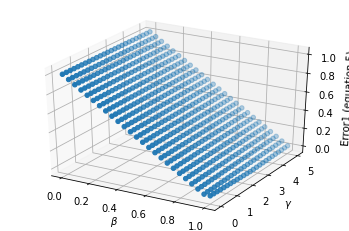

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')
ax.scatter3D(Beta_v, Gamma_v, matrix1)
ax.set_xlabel(r'$β$')
ax.set_ylabel(r'$γ$')
ax.set_zlabel('Error1 (equation 5)')
#x.label("Beta")
#y.label("Gamma")
plt.show()


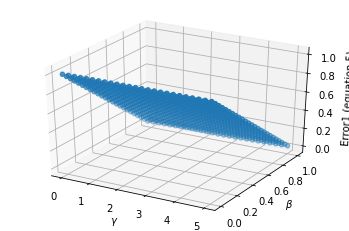

In [17]:

ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')
ax.scatter3D(Gamma_v, Beta_v, matrix1)
ax.set_ylabel(r'$β$')
ax.set_xlabel(r'$γ$')
ax.set_zlabel('Error1 (equation 5)')
#x.label("Beta")
#y.label("Gamma")
plt.show()


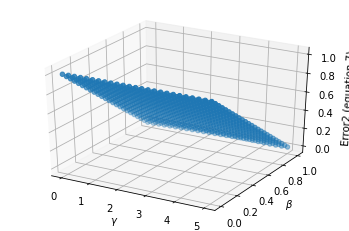

In [18]:
bx = plt.axes(projection='3d')

bx = plt.axes(projection='3d')
bx.scatter3D(Gamma_v, Beta_v, matrix2)
bx.set_ylabel(r'$β$')
bx.set_xlabel(r'$γ$')
bx.set_zlabel('Error2 (equation 7)')
plt.show()

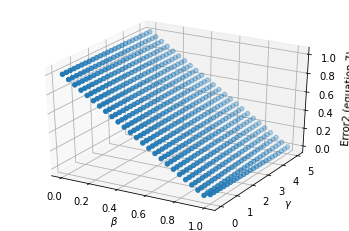

In [19]:
bx = plt.axes(projection='3d')

bx = plt.axes(projection='3d')
bx.scatter3D(Beta_v, Gamma_v, matrix2)
bx.set_xlabel(r'$β$')
bx.set_ylabel(r'$γ$')
bx.set_zlabel('Error2 (equation 7)')
plt.show()


## Section 3: Orderbooks and Asset Pricing

In [450]:
import pickle
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

AAPL = pd.read_pickle("AAPL")
C = pd.read_pickle("C")
GBX = pd.read_pickle("GBX")
SPY = pd.read_pickle("SPY")
THO = pd.read_pickle("THO")

In [451]:
t = np.shape(AAPL[0])

i = 0 # timestamp (every 60 seconds)
j = 1 # Whether want date or data
g = 2 # Every order available at time i

#Get the price
#print("Price ", data[5][1].keys())

#Get the number of shares
print("Number of shares", AAPL[5][1][0][0])

# Get the order
print("Order", AAPL[5][1][0][1])

Number of shares 43534
Order B


In [524]:

### Define Class
class Orderbooks:
    """
    Attributes: 
    - data = pd.DataFrame of the orders containing the Price, the Quantity and the direction of each order
    - timestamp = the corresponding timestamp
    """
    
    
    # Initialization / instance attributes
    def __init__(self, data):
    
        self.timestamp = data[0]
        frame = pd.DataFrame.from_dict(data[1], orient="index")
        selling = np.array(frame[1]=="S")*1. - np.array(frame[1]=="B")*(1.)
        
        dataset = pd.DataFrame()
        dataset["Price"] = np.array(frame.index)
        dataset["Quantity"] = np.array(frame[0])
        dataset["Selling"] = selling 
                
        # True midpoint of BBO
        lowest_sale = dataset[dataset["Selling"]==1]["Price"].min()
        max_buy = dataset[dataset["Selling"]==(-1)]["Price"].max()
        self.BBO = (lowest_sale + max_buy) /2
        
        
        dataset = dataset[np.abs(dataset.Price-self.BBO) < (2*dataset.Price.std())]
        dataset = dataset[dataset["Quantity"] < dataset["Quantity"].quantile(0.80)]
        dataset["Buy_book"] = dataset[dataset["Selling"] == -1].sort_values(by='Price', ascending=False)["Quantity"].cumsum()
        dataset["Sell_book"] = dataset[dataset["Selling"] == 1].sort_values(by='Price', ascending=True)["Quantity"].cumsum()
        dataset["Buy_book"] = dataset["Buy_book"].fillna(0)        
        dataset["Sell_book"] = dataset["Sell_book"].fillna(0)      
        dataset["Quantity_net"] = dataset["Sell_book"] - dataset["Buy_book"]
        dataset["Orders"] = dataset["Selling"] * dataset["Quantity"]
        

        
        self.data = dataset
        

        
        
    def Estimate_params(self, σ):
        '''
        Estimate the Kyle model on 1 order book (at one point in time)
        '''
        
        X = self.data[np.abs(self.data.Price-self.BBO) < (σ*self.data.Price.std())]['Price']
        X = sm.add_constant(X.values)
        model = sm.OLS(self.data[np.abs(self.data.Price-self.BBO) < (σ*self.data.Price.std())]['Quantity_net'],X)
        results = model.fit()
      
        return results.params
    
    # Question 1
    def Plot_orderbook(self, σ):
        '''
        Plot the order book + fit
        '''
        # plot data
        #fig, ax = plt.subplots(figsize=(15,7))
        # use unstack()
        X = self.data.sort_values(by='Price', ascending=True)[np.abs(self.data.Price-self.BBO) < (σ*self.data.Price.std())]
        X.plot(x='Price', y='Quantity_net')
        sns.regplot(x="Price", y="Quantity_net", data= X)
        
    # Question 3
    def Get_BBO(self, σ):
        
        # Computed p0
        estimate = self.Estimate_params(σ)
        α_hat = estimate[0]
        β_hat = estimate[1]
        p0 = - α_hat / β_hat
    
        return p0
         
        
        
        
        

### Question 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


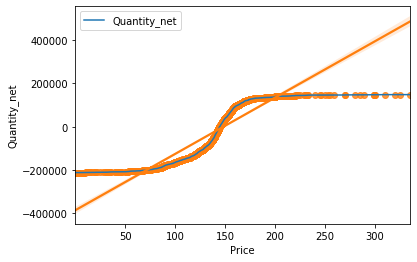

In [506]:
### Question 1
essaiApple = Orderbooks(AAPL[1])
essaiApple.Plot_orderbook(σ=1)
#essaiApple.Estimate_order()
#essaiApple.BBO()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


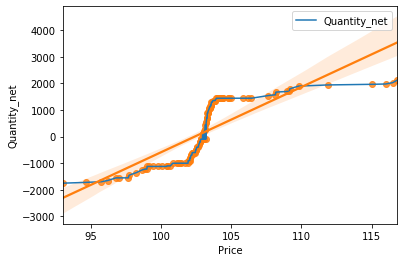

In [508]:
essaiTHO = Orderbooks(THO[5])
essaiTHO.Plot_orderbook(σ=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


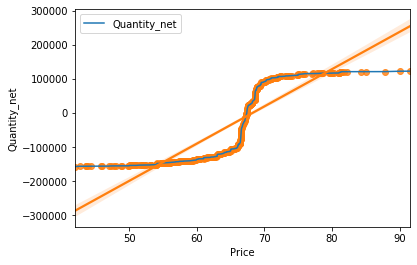

In [509]:
essaiC = Orderbooks(C[5])
essaiC.Plot_orderbook(σ=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


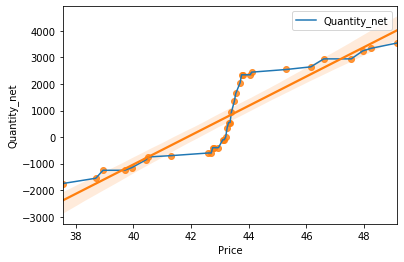

In [510]:
essaiGBX = Orderbooks(GBX[5])
essaiGBX.Plot_orderbook(σ=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


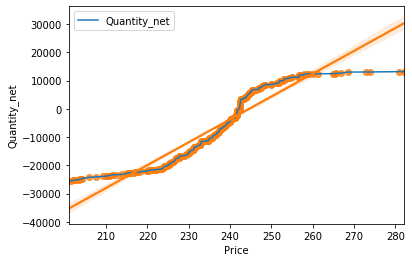

In [511]:
essaiSPY = Orderbooks(SPY[5])
essaiSPY.Plot_orderbook(σ=1)

Overall, this method fits well at the tails, but not well at all close to the midpoint, where the value of the order book is either highly negative (on the "buy" side) or highly positive (on the "sale" side).

If one is interested in fitting what happens close to the midpoints, ie where transactions actually happen, one should estimate the model only using a subset of the orderbook. More precisely, one should use only the part of the orderbook close to the midpoint.

### Question 2

In [517]:
def plot_evol_ratio_demand(data_raw,
                          graph_title = 'Ticker',
                          σ=1):
    
    time_serie = np.zeros(len(data_raw))
    value_ratio = np.zeros(len(data_raw))

    for i in range(len(data_raw)):
        data_i = Orderbooks(data_raw[i])
        
        value_ratio[i] = data_i.Estimate_params(σ)[1]
        #print(data_i.timestamp)
        time_serie[i] = data_i.timestamp
        
    plt.plot(time_serie, value_ratio)
    plt.title(graph_title)
    plt.show()
        
    return(0)

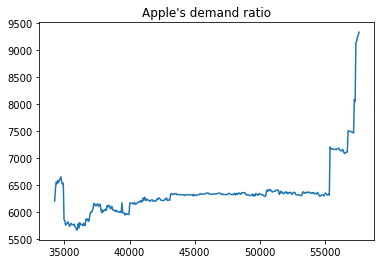

0

In [518]:
plot_evol_ratio_demand(AAPL, graph_title="Apple's demand ratio",
                      σ=0.1)


Apple's demand ratio only increases at the end of the day, as investors wait until the last moment to be sure uncertainty for the day is down (probability that a news affecting the stock value happens before the end of the day).

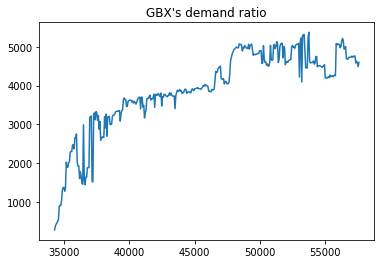

0

In [521]:
plot_evol_ratio_demand(GBX, graph_title="GBX's demand ratio", σ=1)



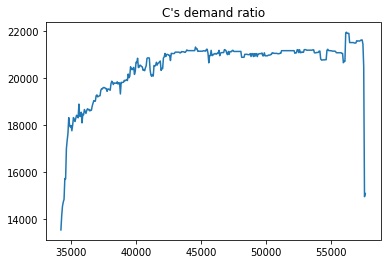

0

In [522]:
plot_evol_ratio_demand(C, graph_title="C's demand ratio", σ=0.5)



Citigroup's demand ratio is very stable during the day. Once again, this is not surprising as, on a regular day, one should not expect news affecting citibank's value (macro news).

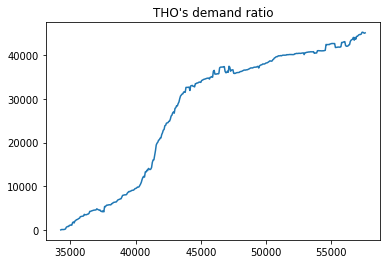

0

In [523]:
plot_evol_ratio_demand(THO, graph_title="THO's demand ratio", 
                      σ=1)



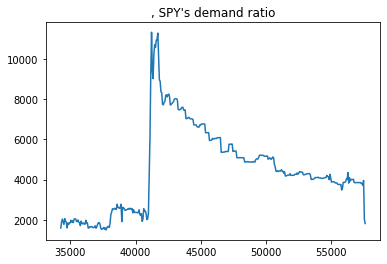

0

In [525]:
plot_evol_ratio_demand(SPY, graph_title="SPY's demand ratio",
                      σ=0.1)

SPY500's demand ratio is very unstable and doesn't increase along the day.

### Question 3

In [533]:
def plt_bbo_p0(data_raw,graph_title = 'Ticker', 
               σ=1):
    
    time_serie = np.zeros(len(data_raw))
    p0 = np.zeros(len(data_raw))
    bb0 = np.zeros(len(data_raw))
    
    
    for i in range(len(data_raw)):
        data_i = Orderbooks(data_raw[i])
        
        p0[i] = data_i.Get_BBO(σ)
        bb0[i] = data_i.BBO
        time_serie[i] = data_i.timestamp
        
    plt.plot(time_serie, p0, label="p0 computed")
    plt.plot(time_serie, bb0, label="True BBO")
    plt.title(graph_title)
    plt.legend()
    plt.show()
        
    return(0)

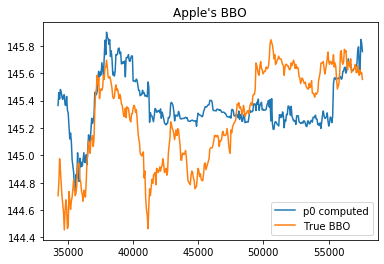

0

In [536]:
plt_bbo_p0(AAPL, graph_title="Apple's BBO", σ= 0.1)

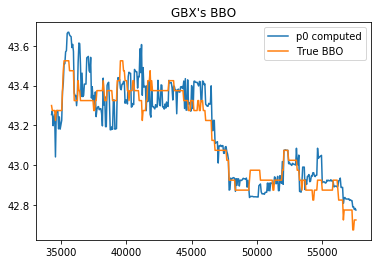

0

In [537]:
plt_bbo_p0(GBX, graph_title="GBX's BBO", σ = 0.1)

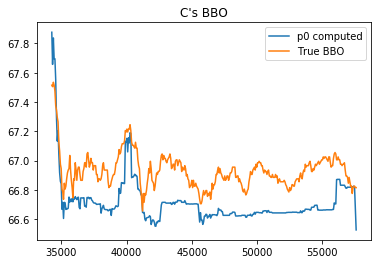

0

In [538]:
plt_bbo_p0(C, graph_title="C's BBO", σ = 0.1)

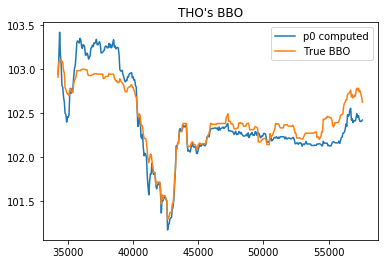

0

In [539]:
plt_bbo_p0(THO, graph_title="THO's BBO", σ = 0.1)

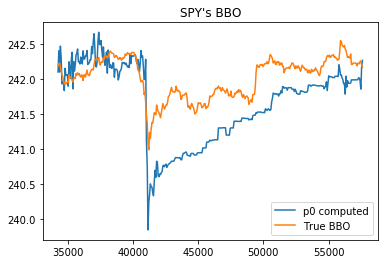

0

In [540]:
plt_bbo_p0(SPY, graph_title="SPY's BBO", σ = 0.1)

**What do these differences say about the nature of the orderbook and the estimation procedure you are using?**

The sharper (high buy and sell peaks close to the midpoint) the orderbook, the more one should restrict the range of prices used to run the estimatio. Different values of sigma can lead to **very** different estimation results....

The estimation procedure does not fit highly volatile stocks very well (SPY, Apple, C).


### Question 4

See above (below graphs)